# Question 1 Homework 5 ADM

## Prelimiar activities 

In [1]:
import os
import pandas as pd
import numpy as np
import ijson
import time
from tqdm.notebook import tqdm
import csv
import json

In [2]:
os.chdir('C:\\Users\\Jacopo\\Downloads\\ADM\\Homework 5')
#file_path = 'dblp.v12.json'

### Loading the dataset

The main problem with the loading and saving actions on this dataset was related to its dimension, around 12 GB, that made it impossible to read through usual reading techniques, such as 'pd.read_json()'. The strategy that we used to manage the problem was processing the original JSON file in batches and splitting it into 2 parts based on the total number of papers; the results were stored into 2 Dataframes, 'data_part1' and 'data_part2'. These 2 datasets were saved in the 'csv' format to make them easier to open, once stored in the computer. Finally, they were merged to form a new dataset, 'citations_dataset_final.csv', that we will use for the whole Point 1.

In [ ]:
BATCH_SIZE = 10000
TOTAL_PAPERS = 3000000

columns = ['id', 'num_authors', 'authors', 'n_citation', 'reference_count', 'references']
data_part1 = pd.DataFrame(columns=columns)
data_part2 = pd.DataFrame(columns=columns)

with open(file_path, "rb") as f:
    batch = []

    for i, element in tqdm(enumerate(ijson.items(f, "item")), desc="Processing Papers", unit=" papers", total=TOTAL_PAPERS):
        paper = {}
        paper['id'] = element['id']

        authors = element.get('authors')
        if authors:
            paper['num_authors'] = len(authors)
            paper['authors'] = [auth for auth in authors]

        n_citation = element.get('n_citation')
        paper['n_citation'] = n_citation if n_citation else 0

        references = element.get('references')
        paper['reference_count'] = len(references) if references else np.nan
        paper['references'] = references if references else np.nan

        batch.append(paper)

        if len(batch) == BATCH_SIZE:
            if i < TOTAL_PAPERS / 2:
                data_part1 = pd.concat([data_part1, pd.DataFrame(batch)], ignore_index=True)
            else:
                data_part2 = pd.concat([data_part2, pd.DataFrame(batch)], ignore_index=True)

            batch = []

    if i < TOTAL_PAPERS / 2:
        data_part1 = pd.concat([data_part1, pd.DataFrame(batch)], ignore_index=True)
    else:
        data_part2 = pd.concat([data_part2, pd.DataFrame(batch)], ignore_index=True)

data_part1.to_csv("citations_dataset_part1.csv", index=False)
data_part2.to_csv("citations_dataset_part2.csv", index=False)

In [ ]:
data_part1 = pd.read_csv("citations_dataset_part1.csv")
data_part2 = pd.read_csv("citations_dataset_part2.csv")

final_data = pd.concat([data_part1, data_part2], ignore_index=True)

final_data.to_csv("citations_dataset_final.csv", index=False)

### Preprocessing

In this phase of the task, we cleaned the initial dataset and sorted it accrding to the number of references obtained by that paper, in this way we created the 'dataset_top_citation' dataframe that contains only the 10.000 papers with the highiest number of citations. This new dataframe will be fundamental to complete the following tasks, any operation will be based on it.

In [3]:
dataset = pd.read_csv('citations_dataset_final.csv')
dataset

,id,num_authors,authors,n_citation,reference_count,references
0,1091,8.0,"[{'name': 'Makoto Satoh', 'org': 'Shinshu Univ...",1,2.0,"[2005687710, 2018037215]"
1,1388,1.0,"[{'name': 'Pranava K. Jha', 'id': 2718958994}]",1,NaN,NaN
2,1674,2.0,"[{'name': 'G. Beale', 'org': 'Archaeological C...",1,15.0,"[1535888970, 1992876689, 1993710814, 203565334..."
3,1688,4.0,"[{'name': 'Altaf Hossain', 'org': 'Department ...",6,3.0,"[1560724230, 1986968751, 2156909104]"
4,5411,4.0,"[{'name': 'Rafael Álvarez', 'id': 2125293936},...",0,NaN,NaN
...,...,...,...,...,...,...
4894076,99905544,5.0,"[{'name': 'S. Nandagopalan', 'org': 'Dept. of ...",2,8.0,"[1562217771, 1625504505, 2015022770, 210875170..."
4894077,99884553,1.0,"[{'name': 'Koen Cornelis Hubertus Blom', 'org'...",0,NaN,NaN
4894078,999847014,11.0,"[{'name': 'Gert Læssøe Mikkelsen', 'org': 'Ale...",1,6.0,"[1940933138, 1975620021, 1978183200, 209759592..."
4894079,9990887,2.0,"[{'name': 'Rajesh Natarajan', 'org': 'Indian I...",0,NaN,NaN


In [4]:
column_to_drop_nan_values = 'references'
dataset = dataset.sort_values(by='n_citation', ascending=False)
dataset = dataset.dropna(subset=[column_to_drop_nan_values])
dataset_top_citation = dataset.head(10000)
dataset_top_citation = dataset_top_citation.reset_index(drop=True)
dataset_top_citation

,id,num_authors,authors,n_citation,reference_count,references
0,2151103935,1.0,"[{'name': 'David G. Lowe', 'org': 'Computer Sc...",35541,33.0,"[19720318, 1541642243, 1560959218, 1676552347,..."
1,2911964244,1.0,"[{'name': 'Leo Breiman', 'org': 'Statistics De...",34741,11.0,"[1507255258, 1580948147, 1605688901, 197584664..."
2,2153635508,2.0,"[{'name': 'Chih-Chung Chang', 'org': 'National...",31047,34.0,"[1510526001, 1543810117, 1556115774, 156879334..."
3,1791587663,1.0,"[{'name': 'Fred D. Davis', 'org': 'Computer an...",25855,22.0,"[157213131, 1520103841, 1778357938, 1972888601..."
4,2119821739,2.0,"[{'name': 'Corinna Cortes', 'org': 'AT&T Bell ...",22276,3.0,"[2087347434, 2154579312, 2168228682]"
...,...,...,...,...,...,...
9995,2124827397,3.0,"[{'name': 'Pawan Goyal', 'org': 'Distributed M...",551,27.0,"[1588883745, 1941732106, 1973544909, 199548424..."
9996,2120894402,4.0,"[{'name': 'Jessica K. Hodgins', 'org': 'Colleg...",551,22.0,"[1798187755, 1967934102, 1987574258, 198770668..."
9997,1982180670,2.0,"[{'name': 'Richard J. Lipton', 'id': 277112432...",551,12.0,"[1530008367, 1980572240, 2026191634, 203462313..."
9998,1559983024,1.0,"[{'name': 'Claudio S. Pinhanez', 'org': 'IBM T...",551,14.0,"[74179108, 137024741, 1987928129, 2007760386, ..."


## Citation graph

The first part of the Point 1 is about the generation of a graph, called 'citation graph', that should represent the papers' citation relationship, it will be an unweighted and directed graph, in which the nodes will be the papers and the edges will represent the citation given from one paper to another. The first action we performed was isolating just the 2 column we needed 'id' and 'references' from the original dataset, to create a new dataset, called 'dataset_top_citation_citation_graph'. Origially, the column 'references' was made of strings, in wich for each row there was just one string, so we needed to manipulate it to perform the necessary operations, in particular we removed the squared brackets and the converted the singluar initial string into a list of strings, in which every id was a singluar string.

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import ast
import itertools

In [6]:
dataset_top_citation_citation_graph = dataset_top_citation[['id','references']]
dataset_top_citation_citation_graph

,id,references
0,2151103935,"[19720318, 1541642243, 1560959218, 1676552347,..."
1,2911964244,"[1507255258, 1580948147, 1605688901, 197584664..."
2,2153635508,"[1510526001, 1543810117, 1556115774, 156879334..."
3,1791587663,"[157213131, 1520103841, 1778357938, 1972888601..."
4,2119821739,"[2087347434, 2154579312, 2168228682]"
...,...,...
9995,2124827397,"[1588883745, 1941732106, 1973544909, 199548424..."
9996,2120894402,"[1798187755, 1967934102, 1987574258, 198770668..."
9997,1982180670,"[1530008367, 1980572240, 2026191634, 203462313..."
9998,1559983024,"[74179108, 137024741, 1987928129, 2007760386, ..."


In [7]:
dataset_top_citation_citation_graph.loc[:,'references'] = dataset_top_citation_citation_graph['references'].apply(lambda x: x.replace('[', '').replace(']', ''))
dataset_top_citation_citation_graph.loc[:,'references'] = dataset_top_citation_citation_graph['references'].apply(lambda x: x.split(','))
dataset_top_citation_citation_graph.loc[:,'id'] = dataset_top_citation_citation_graph['id'].astype(str)

In [8]:
all_ids = dataset_top_citation_citation_graph['id'].tolist()
all_ids = [id_.strip() for id_ in all_ids]
def references_under_id(ids_list):
    return [id_.strip() for id_ in ids_list if id_.strip() in all_ids]
dataset_top_citation_citation_graph = dataset_top_citation_citation_graph.copy()
dataset_top_citation_citation_graph.loc[:,'references_under_id'] = dataset_top_citation_citation_graph['references'].apply(references_under_id)
dataset_top_citation_citation_graph

,id,references,references_under_id
0,2151103935,"[19720318, 1541642243, 1560959218, 16765523...","[1676552347, 1949116567, 2011891945, 202466829..."
1,2911964244,"[1507255258, 1580948147, 1605688901, 197584...","[1605688901, 1975846642, 2112076978, 211324281..."
2,2153635508,"[1510526001, 1543810117, 1556115774, 156879...","[1510526001, 1568793342, 1621799579, 205698353..."
3,1791587663,"[157213131, 1520103841, 1778357938, 1972888...","[1972888601, 1988410705, 2037021532, 209248890..."
4,2119821739,"[2087347434, 2154579312, 2168228682]","[2087347434, 2154579312]"
...,...,...,...
9995,2124827397,"[1588883745, 1941732106, 1973544909, 199548...","[2073440460, 2098289156, 2098375698, 209944078..."
9996,2120894402,"[1798187755, 1967934102, 1987574258, 198770...","[2117085697, 2127197749, 2150312211, 2293545866]"
9997,1982180670,"[1530008367, 1980572240, 2026191634, 203462...",[]
9998,1559983024,"[74179108, 137024741, 1987928129, 200776038...","[2140235142, 2149891956, 2158683916, 2237155658]"


With this code we create a new column, called 'references_under_id' that contains only the ids, taken from the column references, that are contained in the column 'id', this can be done thanks to the function 'references_under_id'. In this way we isolate all the relationships between papers that are present in the top 10.000 papers according the number of citations. This is the base to build the citation graph.

In [10]:
G_citation = nx.DiGraph()
G_citation.add_nodes_from(dataset_top_citation_citation_graph['id'])
for _, row in dataset_top_citation_citation_graph.iterrows():
    source_node_citation_graph = row['id']
    target_node_citation_graph = row['references_under_id']
    G_citation.add_edges_from([(source_node_citation_graph, target_node) for target_node in target_node_citation_graph])

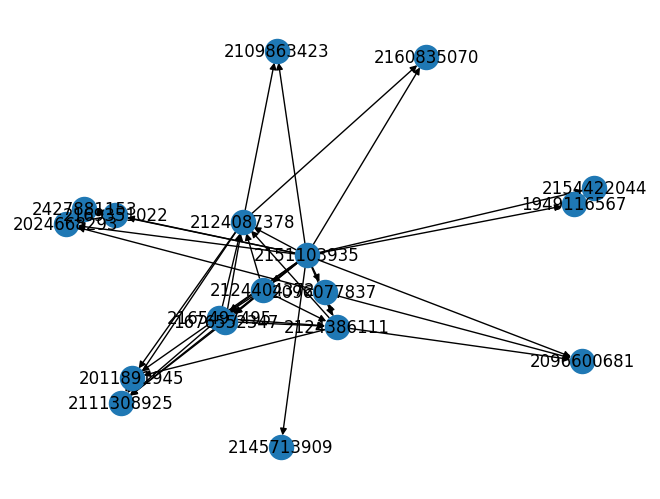

In [11]:
first_node_to_show = dataset_top_citation_citation_graph.iloc[0]
source_node = first_node_to_show['id']
target_node = first_node_to_show['references_under_id']
subgraph_node_citation_graph = [source_node] + target_node
subgraph = G_citation.subgraph(subgraph_node_citation_graph)
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, arrowsize=10)
plt.show()

The nodes and the edges has been created according to what we said previously, we decided to show a small subportion of the whole graph by plotting only the first node (the node that corresponds to the first id) with the relative edges and nodes to which it is connected. As we can see from the polt, the graph is not built to just show the relationships between the nodes under the column id and the relative nodes under the column 'reference_under_id', but it represents the relationships among the nodes present inside that column, as for example, the relationship between the node 2124087378 and 2109863423.

## Collaboration graph

This graph representsthe second task of the Point 1, the target is to create a 'collaboration graph that should represent the collaborations of the papers' authors, it should be weighted and undirected.
The necessary column for this task was the column 'authors', and we isoltaed it to perform all the operations, creating the dataset 'dataset_top_citation_collaboration_graph'. Similarly to the column 'references', the rows under this column were just singular strings, so we had to manipulate them closely to what we did for the citation graph. Once we processed them we just got lists of strings in the form ['id' 'numeric id']. Our goal was to obtain a column similar to the 'refernces' one, to reach this target, we used the function clean_strings_authors, that extracts just the numeric values form the strings inside the lists, in order to have only the numeric ids on which we will build the final graph.

In [12]:
dataset_top_citation_collaboration_graph = dataset_top_citation[['authors']]
dataset_top_citation_collaboration_graph

,authors
0,"[{'name': 'David G. Lowe', 'org': 'Computer Sc..."
1,"[{'name': 'Leo Breiman', 'org': 'Statistics De..."
2,"[{'name': 'Chih-Chung Chang', 'org': 'National..."
3,"[{'name': 'Fred D. Davis', 'org': 'Computer an..."
4,"[{'name': 'Corinna Cortes', 'org': 'AT&T Bell ..."
...,...
9995,"[{'name': 'Pawan Goyal', 'org': 'Distributed M..."
9996,"[{'name': 'Jessica K. Hodgins', 'org': 'Colleg..."
9997,"[{'name': 'Richard J. Lipton', 'id': 277112432..."
9998,"[{'name': 'Claudio S. Pinhanez', 'org': 'IBM T..."


In [13]:
dataset_top_citation_collaboration_graph.loc[:,'authors'] = dataset_top_citation_collaboration_graph['authors'].apply(lambda x: x.replace('[', '').replace(']', '')).copy()
dataset_top_citation_collaboration_graph.loc[:,'authors'] = dataset_top_citation_collaboration_graph['authors'].apply(lambda x: x.replace('{', '').replace('}', '')).copy()
dataset_top_citation_collaboration_graph.loc[:,'authors'] = dataset_top_citation_collaboration_graph['authors'].apply(lambda x: x.replace(':', '')).copy()
dataset_top_citation_collaboration_graph.loc[:,'authors'] = dataset_top_citation_collaboration_graph['authors'].apply(lambda x: x.replace('David', '')).copy()
dataset_top_citation_collaboration_graph.loc[:,'authors'] = dataset_top_citation_collaboration_graph['authors'].apply(lambda x: x.split(','))
dataset_top_citation_collaboration_graph.loc[:,'authors'] = dataset_top_citation_collaboration_graph['authors'].apply(lambda authors: list(filter(lambda author: 'id' in author, authors)))
dataset_top_citation_collaboration_graph

,authors
0,[ 'id' 2104328312]
1,[ 'id' 2569376642]
2,"[ 'id' 2895256545, 'id' 2168176072]"
3,[ 'id' 2427477170]
4,"[ 'id' 2134830209, 'id' 2022407533]"
...,...
9995,"[ 'id' 2152918269, 'id' 2020627909, 'id' 266..."
9996,"[ 'id' 601642093, 'id' 1980379243, 'id' 2030..."
9997,"[ 'id' 2771124329, 'id' 350567680]"
9998,[ 'id' 320969846]


In [14]:
def clean_strings_authors(lst):
    cleaned_list = []
    for x in lst:
        ids_authors_only = ''.join(char for char in x if char.isdigit())
        if ids_authors_only:
            cleaned_list.append(int(ids_authors_only))
    return cleaned_list

dataset_top_citation_collaboration_graph.loc[:,'authors'] = dataset_top_citation_collaboration_graph['authors'].apply(clean_strings_authors)
dataset_top_citation_collaboration_graph

,authors
0,[2104328312]
1,[2569376642]
2,"[2895256545, 2168176072]"
3,[2427477170]
4,"[2134830209, 2022407533]"
...,...
9995,"[2152918269, 2020627909, 2662983009]"
9996,"[601642093, 1980379243, 2030310643, 2104748382]"
9997,"[2771124329, 350567680]"
9998,[320969846]


In [17]:
G_collaboration = nx.Graph()

for _, row in dataset_top_citation_collaboration_graph.iterrows():
    author_list = row['authors']
    for collaboration in itertools.combinations(author_list, 2):
        if G_collaboration.has_edge(*collaboration):
            G_collaboration[collaboration[0]][collaboration[1]]['weight'] += 1
        else:
            G_collaboration.add_edge(*collaboration, weight=1)

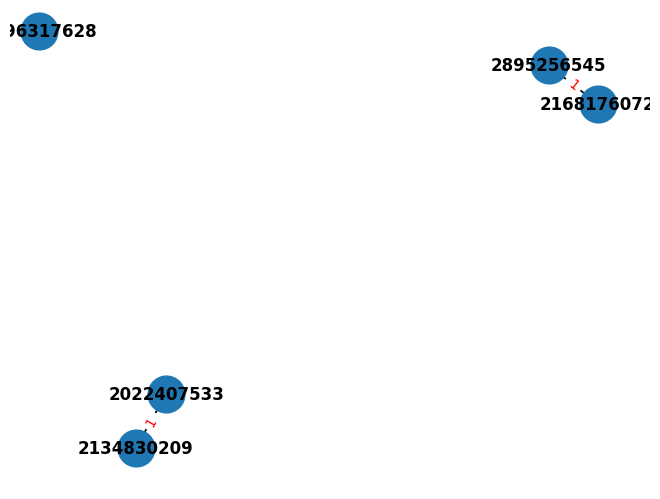

In [18]:
nodes_to_show = list(G_collaboration.nodes())[:5]
subgraph_collaboration = G_collaboration.subgraph(nodes_to_show)
pos = nx.spring_layout(subgraph_collaboration)
nx.draw(subgraph_collaboration, pos, with_labels=True, font_weight='bold', node_size=700)
edge_weights = {(i, j): subgraph_collaboration[i][j]['weight'] for i, j in subgraph_collaboration.edges()}
nx.draw_networkx_edges(subgraph_collaboration, pos, width=[subgraph_collaboration[i][j]['weight'] for i, j in subgraph_collaboration.edges()])
nx.draw_networkx_edge_labels(subgraph_collaboration, pos, edge_labels=edge_weights, font_color='red')
plt.show()

As long as this second graph conatins the weights, we would like explicit what we used as weights: the final collaboration graph contains a red number inside the edge, that number is the weight of that edge and it represents how many times that authors collaborated, for example in the final plot the authors 2895256545 and 2168176072 collaborated just one time, this means that these 2 ids appear just one time in the same list under the column author in the whole dataset.